* First, mount your google drive
* Upload Project1_2023S folder to the google drive 'comp_vision' folder
* Here, we show the example codes to help your project running in colab

In [1]:
!pwd
!ls
%cd /content/drive/My\ Drive/comp_vision
!ls

/Users/jang-yeonghwan/yonsei_assignment/23-1/cv/Project1_2023S
CV-Project1.pdf     task1               task3
colab_example.ipynb task2
[Errno 2] No such file or directory: '/content/drive/My Drive/comp_vision'
/Users/jang-yeonghwan/yonsei_assignment/23-1/cv/Project1_2023S
CV-Project1.pdf     task1               task3
colab_example.ipynb task2


In [1]:
## import required library
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1-1

In [8]:
import cv2
import numpy as np

# Do not erase or modify any lines already written


def apply_average_filter(img, kernel_size):
    """
    This is function for task 1-1.
    It takes 2 arguments, 
    'img' is input image.
    'kernel_size' is size of kernel for average filter.
    """
    edge = int((kernel_size - 1) / 2)

    row_len = len(img)
    col_len = len(img[0])

    adj_value = 1 / (kernel_size ** 2)

    img_result = np.full((row_len, col_len, 3), 0)

    # if kernel_size == 1:
    #     return img

    for row in range(edge, row_len-edge):
        for col in range(edge, col_len-edge):
            temp_0, temp_1, temp_2 = 0, 0, 0
            
            for result_row in range(row-edge, row+edge+1):
                for result_col in range(col-edge, col+edge+1):
                    temp_0 += img[result_row, result_col, 0]
                    temp_1 += img[result_row, result_col, 1]
                    temp_2 += img[result_row, result_col, 2]

            temp_0, temp_1, temp_2 = temp_0 * adj_value, temp_1 * adj_value, temp_2 * adj_value
            img_result[row, col] = [temp_0, temp_1, temp_2]

    return img_result

def apply_sobel_filter(img, kernel_size, is_vertical):
    """
    This is function for task 1-1.
    It takes 3 arguments,
    'img' is input image.
    'kernel_size' is size of kernel for sobel filter.
    'is_vertical' is boolean value. If it is True, you should apply vertical sobel filter.
    Otherwise, you should apply horizontal sobel filter.

    """

    # sobel kernel setting
    sobel_kernel = np.full((kernel_size, kernel_size), 0)
    blur, derivative = [], []


    if kernel_size == 3:
        blur = [1, 2, 1]
        derivative = [-1, 0, 1]
    elif kernel_size == 5:
        blur = [1, 4, 6 ,4 ,1]
        derivative = [-1, -2, 0, 2, 1]
    elif kernel_size == 7:
        blur = [1, 6, 15, 20, 15, 6, 1]
        derivative = [-1, -4, -5, 0, 5, 4, 1]


    for row in range(kernel_size):
        for col in range(kernel_size):
            ver_val = blur[row] * derivative[col]
            hor_val = derivative[row] * blur[col]

            sobel_kernel[row][col] = ver_val if is_vertical == True else hor_val

    # result setting
    edge = int((kernel_size - 1) / 2)

    row_len = len(img)
    col_len = len(img[0])

    img_result = np.full((row_len, col_len, 1), 0)

    for row in range(edge, row_len-edge):
        for col in range(edge, col_len-edge):
            temp = 0

            for result_row in range(row-edge, row+edge+1):
                for result_col in range(col-edge, col+edge+1):
                    # 0 ~ kernel_size
                    kernel_row = result_row - (row-edge)
                    kernel_col = result_col - (col-edge)

                    temp += img[result_row, result_col, 0] * sobel_kernel[kernel_row][kernel_col]

            img_result[row, col, 0] = np.clip(temp, 0, 255)

    return img_result

## Task 1-2

In [39]:
import cv2
import numpy as np
import math


def distance(x, y, i, j):
    return np.sqrt((x-i)**2 + (y-j)**2)


def gaussian(x, sigma):
    return (1.0 / (2 * math.pi * (sigma ** 2))) * math.exp(- (x ** 2) / (2 * sigma ** 2))


def apply_bilateral_filter(source, filtered_image, x, y, diameter, sigma_i, sigma_s):
    hl = diameter//2

    for color in range(3):
        i_filtered = 0
        Wp = 0
        i = 0

        while i < diameter:
            j = 0

            while j < diameter:
                neighbour_x = x - (hl - i)
                neighbour_y = y - (hl - j)

                if neighbour_x >= len(source):
                    neighbour_x -= len(source)

                if neighbour_y >= len(source[0]):
                    neighbour_y -= len(source[0])

                # print(source[neighbour_x][neighbour_y])
                # print(source[x][y])
                # print(source[neighbour_x][neighbour_y] - source[x][y])

                gi = gaussian(source[neighbour_x]
                              [neighbour_y][color] - source[x][y][color], sigma_i)
                gs = gaussian(
                    distance(neighbour_x, neighbour_y, x, y), sigma_s)

                w = gi * gs
                i_filtered += source[neighbour_x][neighbour_y][color] * w

                Wp += w
                j += 1
            i += 1

        i_filtered = i_filtered / Wp
        filtered_image[x][y][color] = int(round(i_filtered))


def bilateral_filter_own(source, filter_diameter, sigma_i, sigma_s):

    row_len = len(source)
    col_len = len(source[0])
    filtered_image = img_result = np.full((row_len, col_len, 3), 0)

    row = 0
    while row < row_len:
        col = 0
        while col < col_len:
            apply_bilateral_filter(
                source, filtered_image, row, col, filter_diameter, sigma_i, sigma_s)
            col += 1
        row += 1

    print(filtered_image)
    return filtered_image


def task1_2(src_path, clean_path, dst_path):
    """
    This is main function for task 1-2.
    It takes 3 arguments,
    'src_path' is path for source image.
    'clean_path' is path for clean image.
    'dst_path' is path for output image, where your result image should be saved.

    You should load image in 'src_path', and then perform task 1-2,
    and then save your result image to 'dst_path'.
    """
    noisy_img = cv2.imread(src_path)
    clean_img = cv2.imread(clean_path)
    result_img = None

    # do noise removal
    result_img = apply_my_filter(noisy_img)

    rmse = calculate_rmse(result_img, clean_img)

    # cv2.imwrite(dst_path, result_img)

    plt.imshow(result_img)
    plt.axis('off')
    plt.show()

    return rmse


def apply_my_filter(img):
    """
    You should implement additional filter using convolution.
    You can use any filters for this function.
    You can add more arguments for this function if you need.

    You should return result image.
    """
    img_result = bilateral_filter_own(img, 6, 12, 16)

    return img_result


def calculate_rmse(img1, img2):
    """
    Calculates RMS error between two images. Two images should have same sizes.
    """
    if (img1.shape[0] != img2.shape[0]) or \
            (img1.shape[1] != img2.shape[1]) or \
            (img1.shape[2] != img2.shape[2]):
        raise Exception("img1 and img2 should have sime sizes.")

    diff = np.abs(img1.astype(dtype=int) - img2.astype(dtype=int))
    return np.sqrt(np.mean(diff ** 2))


def apply_median_filter(img, kernel_size):
    edge = int((kernel_size - 1) / 2)

    row_len = len(img)
    col_len = len(img[0])

    img_result = np.full((row_len, col_len, 3), 0)

    for row in range(row_len):
        for col in range(col_len):
            temp_0, temp_1, temp_2 = [], [], []

            for result_row in range(row-edge, row+edge+1):
                for result_col in range(col-edge, col+edge+1):
                    try:
                        temp_0.append(img[result_row, result_col, 0])
                    except:
                        pass
                    try:
                        temp_1.append(img[result_row, result_col, 1])
                    except:
                        pass
                    try:
                        temp_2.append(img[result_row, result_col, 2])
                    except:
                        pass

            color_0, color_1, color_2 = np.median(
                temp_0), np.median(temp_1), np.median(temp_2)
            img_result[row, col] = [color_0, color_1, color_2]

    return img_result


def gaussian_kernel(k_size, sigma):
    size = k_size//2

    y, x = np.ogrid[-size:size+1, -size:size+1]
    gaussian_filter = 1/(2*np.pi * (sigma**2)) * np.exp(-1 *(x**2 + y**2) /(2*(sigma**2)))

    sum_of_filter = gaussian_filter.sum()
    gaussian_filter /= sum_of_filter

    return gaussian_filter


def padding(img, k_size):
    pad_size = k_size//2
    rows, cols, ch = img.shape
    
    res = np.zeros((rows + (2*pad_size), cols+(2*pad_size), ch), dtype=np.float64)
    
    if pad_size == 0:
        res = img.copy()
    else:
        res[pad_size:-pad_size, pad_size:-pad_size] = img.copy()

    return res


def apply_gaussian_filter(img, k_size=3, sigma=1):
    rows, cols, channels = img.shape
    gaussian_filter = gaussian_kernel(k_size, sigma)
    pad_img = padding(img, k_size)
    filtered_img = np.zeros((rows, cols, channels), dtype=np.float32)

    for ch in range(0, channels):
        for i in range(rows):
            for j in range(cols):
                filtered_img[i, j, ch] = np.sum(
                    gaussian_filter * pad_img[i:i+k_size, j:j+k_size, ch])

    return filtered_img.astype(np.uint8)


## Execution Example  

In [4]:
cat_clean = cv2.imread('task1/test_images/cat_clean.jpg')
cat_noisy = cv2.imread('task1/test_images/cat_noisy.jpg')

fox_clean = cv2.imread('task1/test_images/fox_clean.jpg')
fox_noisy = cv2.imread('task1/test_images/fox_noisy.jpg')

snowman_clean = cv2.imread('task1/test_images/snowman_clean.jpg')
snowman_noisy = cv2.imread('task1/test_images/snowman_noisy.jpg')

In [29]:
## check RMSE
print(calculate_rmse(cat_clean, cat_noisy))
# print(calculate_rmse(bird_clean, bird_blurred))

# cat -> median 3

# fox -> Gaussian 5,5 1 (basic)
    # fox_denoise = cv2.GaussianBlur(fox_noisy, (5,5), sigma)


# snowman -> median 7
# snow_denoise = cv2.medianBlur(snowman_noisy, 7)
#     print(calculate_rmse(snowman_clean, snow_denoise))


46.17398542877427


11.584764375031543


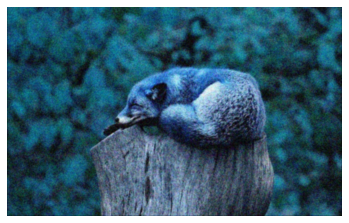

In [38]:
# for sigma in range(1, 7):
# fox_denoise_2 = apply_custom_median_filter(fox_noisy, 5)
# fox_denoise_2 = cv2.blur(fox_denoise_2, (3, 3))

# fox_denoise_2 = cv2.medianBlur(fox_denoise_2, 3)
# fox_denoise_2 = cv2.medianBlur(fox_denoise_2, 5)
# plt.imshow(fox_denoise_2); plt.axis('off'); plt.show()
# print(calculate_rmse(fox_clean, fox_denoise_2))

# cat_denoise_1 = apply_median_filter(cat_noisy, 3)
# print(calculate_rmse(cat_clean, cat_denoise_1))

# fox_denoise_2 = cv2.GaussianBlur(fox_noisy, 3)
# print(calculate_rmse(fox_clean, fox_denoise_2))


# plt.imshow(cat_denoise_1); plt.axis('off'); plt.show()
# plt.imshow(fox_denoise_2); plt.axis('off'); plt.show()


# fox_denoise = apply_median_filter(fox_noisy, 3)
fox_denoise = apply_gaussian_filter(fox_noisy, 3, 1)
# fox_denoise = apply_median_filter(fox_denoise, 5)
# fox_denoise = apply_median_filter(fox_denoise, 3)
print(calculate_rmse(fox_clean, fox_denoise))
plt.imshow(fox_denoise); plt.axis('off'); plt.show()

In [6]:
## define helper function
def rgb2gray(rgb):
    rgb = rgb.astype(np.int32) # [H, W, 3]
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    gray = np.expand_dims(gray.round().astype(np.uint8), -1) # [H, W, 1]
    return gray

In [7]:
bird_clean = cv2.imread('task1/test_images/bird_clean.jpg')
bird_noisy = cv2.imread('task1/test_images/bird_noisy.jpg')

bird_clean_gray = rgb2gray(bird_clean)
bird_noisy_gray = rgb2gray(bird_noisy)



In [10]:
kernel_size=5
bird_clean_blurred = apply_average_filter(bird_clean, kernel_size)
bird_noisy_blurred = apply_average_filter(bird_noisy, kernel_size)

bird_clean_dx = apply_sobel_filter(bird_clean_gray, kernel_size, False)
bird_clean_dy = apply_sobel_filter(bird_clean_gray, kernel_size, True)
bird_noisy_dx = apply_sobel_filter(bird_noisy_gray, kernel_size, False)
bird_noisy_dy = apply_sobel_filter(bird_noisy_gray, kernel_size, True)


In [32]:
## check RMSE
print(calculate_rmse(bird_clean, bird_noisy))
print(calculate_rmse(bird_clean, bird_blurred))


12.544241525996272
16.58447254088615


## Visualization Example

bird_clean


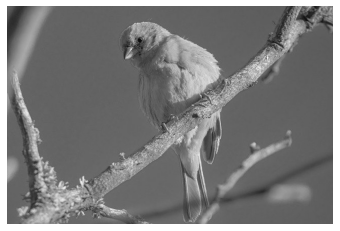

bird_noisy


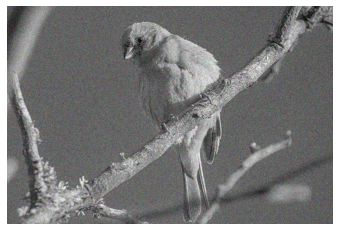

In [9]:
print('bird_clean')
plt.imshow(bird_clean); plt.axis('off'); plt.show()
print('bird_noisy')
plt.imshow(bird_noisy); plt.axis('off'); plt.show()

bird_clean_blurred | avg filter ksize : 5


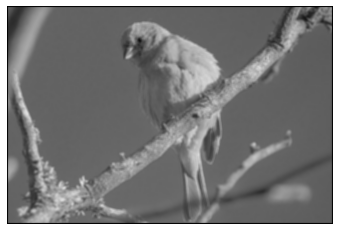

bird_noisy_blurred | avg filter ksize : 5


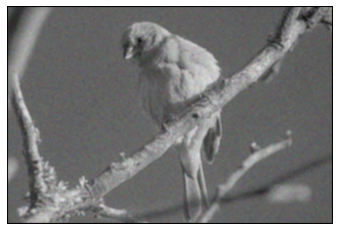

In [12]:
print('bird_clean_blurred | avg filter ksize : 5')
plt.imshow(bird_clean_blurred, cmap='gray'); plt.axis('off'); plt.show()
print('bird_noisy_blurred | avg filter ksize : 5')
plt.imshow(bird_noisy_blurred, cmap='gray'); plt.axis('off'); plt.show()


bird_clean_dx | sobel filter ksize : 5


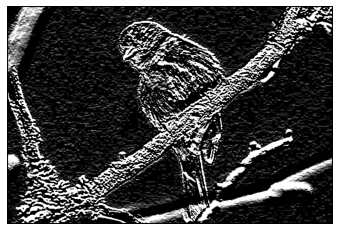

bird_noisy_dx | sobel filter ksize : 5


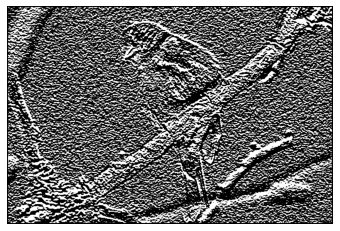

In [13]:
print('bird_clean_dx | sobel filter ksize : 5')
plt.imshow(bird_clean_dx, cmap='gray'); plt.axis('off'); plt.show()
print('bird_noisy_dx | sobel filter ksize : 5')
plt.imshow(bird_noisy_dx, cmap='gray'); plt.axis('off'); plt.show()


bird_clean_dy | sobel filter ksize : 5


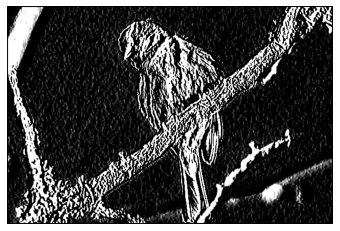

bird_noisy_dy | sobel filter ksize : 5


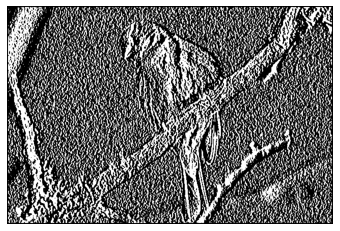

In [14]:
print('bird_clean_dy | sobel filter ksize : 5')
plt.imshow(bird_clean_dy, cmap='gray'); plt.axis('off'); plt.show()
print('bird_noisy_dy | sobel filter ksize : 5')
plt.imshow(bird_noisy_dy, cmap='gray'); plt.axis('off'); plt.show()

## Task 2

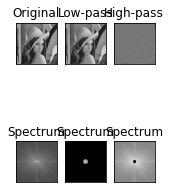

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def fftshift(img):
    '''
    This function should shift the spectrum image to the center.
    You should not use any kind of built in shift function. Please implement your own.
    '''
    row_len, col_len = img.shape
    fft_shifted = np.roll(img, (row_len//2, col_len//2), axis=(0, 1))

    return fft_shifted


def ifftshift(img):
    '''
    This function should do the reverse of what fftshift function does.
    You should not use any kind of built in shift function. Please implement your own.
    '''
    row_len, col_len = np.shape(img)
    fft_unshifted = np.roll(img, (-row_len//2, -col_len//2), axis=(0, 1))

    return fft_unshifted


def fm_spectrum(img):
    '''
    This function should get the frequency magnitude spectrum of the input image.
    Make sure that the spectrum image is shifted to the center using the implemented fftshift function.
    You may have to multiply the resultant spectrum by a certain magnitude in order to display it correctly.
    '''
    fft_img = np.fft.fft2(img)
    result_spectrum = np.log(np.abs(fftshift(fft_img)) + 1)
    return result_spectrum


def low_pass_filter(img, r=30):
    '''
    This function should return an image that goes through low-pass filter.
    '''
    fft_img = np.fft.fft2(img)
    fftshift_img = fftshift(fft_img)

    row_len, col_len = fftshift_img.shape
    row_center, col_center = int(row_len/2), int(col_len/2)

    result_fft_img = fftshift_img.copy()

    for row in range(row_len):
        for col in range(col_len):
            edge_radius = np.sqrt((row_center-row)**2 + (col_center-col)**2)

            if edge_radius > r:
                result_fft_img[row, col] = 0

    ifft_img = ifftshift(result_fft_img)
    result_img = np.fft.ifft2(ifft_img).real

    return result_img


def high_pass_filter(img, r=20):
    '''
    This function should return an image that goes through high-pass filter.
    '''
    fft_img = np.fft.fft2(img)
    fftshift_img = fftshift(fft_img)

    row_len, col_len = fftshift_img.shape
    row_center, col_center = int(row_len/2), int(col_len/2)

    result_fft_img = fftshift_img.copy()

    for row in range(row_len):
        for col in range(col_len):
            edge_radius = np.sqrt((row_center-row)**2 + (col_center-col)**2)

            if edge_radius < r:
                result_fft_img[row, col] = 0


    ifft_img = ifftshift(result_fft_img)
    result_img = np.fft.ifft2(ifft_img).real

    return result_img

#################


if __name__ == '__main__':
    img = cv2.imread('task2/task2_filtering.png', cv2.IMREAD_GRAYSCALE)

    low_passed = low_pass_filter(img)
    high_passed = high_pass_filter(img)

    # save the filtered/denoised images
    # cv2.imwrite('low_passed.png', low_passed)
    # cv2.imwrite('high_passed.png', high_passed)

    # draw the filtered/denoised images
    def drawFigure(loc, img, label):
        plt.subplot(*loc), plt.imshow(img, cmap='gray')
        plt.title(label), plt.xticks([]), plt.yticks([])

    drawFigure((2, 7, 1), img, 'Original')
    drawFigure((2, 7, 2), low_passed, 'Low-pass')
    drawFigure((2, 7, 3), high_passed, 'High-pass')
    # drawFigure((2, 7, 4), fft_shifted, 'fft-shifted')

    drawFigure((2, 7, 8), fm_spectrum(img), 'Spectrum')
    drawFigure((2, 7, 9), fm_spectrum(low_passed), 'Spectrum')
    drawFigure((2, 7, 10), fm_spectrum(high_passed), 'Spectrum')

    plt.show()
    
    # show code for big image
    # print("lpf & spectrum")
    # plt.imshow(low_passed, cmap='gray')
    # plt.axis('off')
    # plt.show()

    # plt.imshow(fm_spectrum(low_passed), cmap='gray')
    # plt.axis('off')
    # plt.show()

    # print("hpf & spectrum")
    # plt.imshow(high_passed, cmap='gray')
    # plt.axis('off')
    # plt.show()

    # plt.imshow(fm_spectrum(high_passed), cmap='gray')
    # plt.axis('off')
    # plt.show()


## Task 3

0. original img


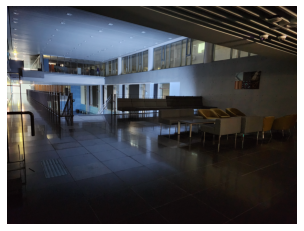

1. cv2 add


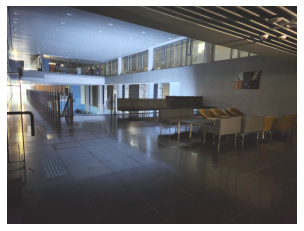

2. contrast


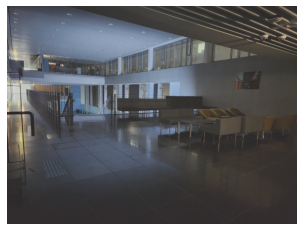

3. histogram equallization


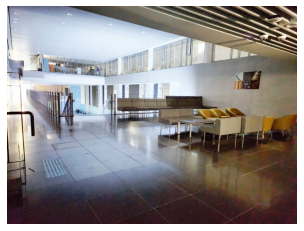

In [3]:
import cv2
import numpy as np

##### To-do #####


def enhancement_1(img):
    """
    This function should return an image that goes through enhancement.
    """
    val = 30

    val_set = np.full(img.shape, (val, val, val), dtype=np.uint8)

    result_img = cv2.add(img, val_set)
    result_img = np.clip(result_img, 0, 255)

    return result_img


def enhancement_2(img):
    """
    This function should return an image that goes through enhancement.
    """

    alpha = -0.3
    result_img = (1+alpha) * img - 128 * alpha
    result_img = np.clip(result_img, 0, 255).astype(np.uint8)

    return result_img


def enhancement_3(img):
    """
    This function should return an image that goes through enhancement.
    """
    # ravel : make flat
    hist, bins = np.histogram(img.ravel(), 256, [0, 256])
    hist_sum = hist.cumsum()

    # except 0 by mask
    hist_m0 = np.ma.masked_equal(hist_sum, 0)

    # equallization
    hist_m0 = (hist_m0 - hist_m0.min()) * 255 / (hist_m0.max() - hist_m0.min())

    # restore 0 from mask excepted
    hist_sum = np.ma.filled(hist_m0, 0).astype('uint8')

    result_img = hist_sum[img]

    return result_img


test_img = cv2.imread('task3/engi_hall_low_light.jpg')

enhanced_img_1 = enhancement_1(test_img)
enhanced_img_2 = enhancement_2(test_img)
enhanced_img_3 = enhancement_3(test_img)

print("0. original img")
plt.imshow(test_img)
plt.axis('off')
plt.show()

print("1. cv2 add")
plt.imshow(enhanced_img_1)
plt.axis('off')
plt.show()

print("2. contrast")
plt.imshow(enhanced_img_2)
plt.axis('off')
plt.show()

print("3. histogram equallization")
plt.imshow(enhanced_img_3)
plt.axis('off')
plt.show()
